<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Logistic_Regression.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline


## Part1: Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

### Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible. In the first part, the code will load the data and display it on a 2-dimensional plot where the axes are the two exam scores, and the positive and negative examples are shown with different marker colors.

In [ ]:
import urllib.request
data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/AbdelMahm/DGI-Lab/master/"
os.makedirs(data_path, exist_ok=True)
for filename in ("log_reg_data1.csv", "log_reg_data2.csv"):
    print("Downloading", filename)
    url = download_path + "datasets/" + filename
    urllib.request.urlretrieve(url, data_path + filename)

ValueError: 'c' argument has 100 elements, which is not acceptable for use with 'x' with size 100, 'y' with size 100.

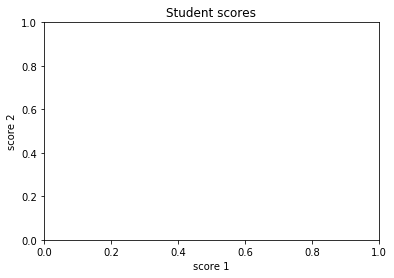

In [3]:
#load data
data = pd.read_csv(data_path + '/log_reg_data1.csv')
data = np.array(data)
X = data[:, [1,2]]
y = data[:, [3]]
n = X.shape[1]
m = len(y)

# display
fig = plt.figure()
plt.title('Student scores')
plt.xlabel('score 1')
plt.ylabel('score 2')
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

#add a column of 1s to X
#X = np.insert(X, 0, values=1, axis=1)

### Get the parameters of the model

$\theta_j$ = clf.coef_, $\theta_0$ = clf.intercept_

In [16]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)

clf.coef_
clf.intercept_

print(clf.coef_[0][0])

0.10289545363167141


/Applications/MiniConda3/envs/mlpylab/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Plot the decision boundary
The decision boundary correspends to the value $y = 0.5$. We can write $x_2$ in terms of $x_1$ by solving the following equation:
$$ 0.5 = \theta_0 + \theta_1*x_1 + \theta_2*x_2 $$

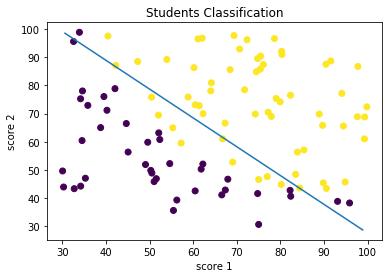

In [17]:
fig = plt.figure()
ax = plt.axes()
plt.title('Students Classification')
plt.xlabel('score 1')
plt.ylabel('score 2')
plt.scatter(X[:,0], X[:,1], c=y)

#generate new points to plot a decision boundary line
x1_vals = np.linspace(min(X[:,1]), max(X[:,1]), 1000)
# the boundry is at line at y = 0.5, we can then write x2 in terms of x1 (0.5 = theta0 + theta1*x1 + theta2*x2)
x2_vals = -(clf.intercept_[0] - 0.5 + clf.coef_[0][0]*x1_vals) / clf.coef_[0][1]

# plot the line
plt.plot(x1_vals, x2_vals)
plt.show()

### Accuracy of the model
the score function measures how well the learned model predicts on a given set. 

In [29]:
#predcition probability of an example
clf.predict_proba(X[1, :])

#predicted class of an example (class with max probability)
clf.predict(X[1, :])

#predcition accuracy on the training set X
clf.score(X, y)

/Applications/MiniConda3/envs/mlpylab/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/MiniConda3/envs/mlpylab/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


0.89

## Part 2: Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression using the ridge method to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### Load and Visualize the data
Similarly to the previous part, we will load and plot the data of the two QA test scores. The positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.

In [30]:
data = pd.read_csv('datasets/log_reg_data2.csv')
data = np.array(data)
X = data[:, [1,2]] 
y = data[:, [3]]
(m,n) = X.shape

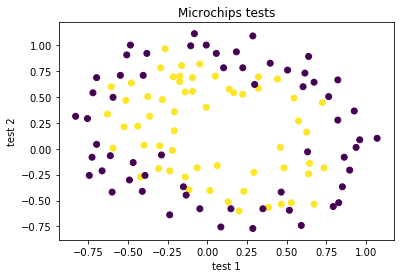

In [31]:
X1 = X[:,0]
X2 = X[:,1]

# display
fig = plt.figure()
plt.title('Microchips tests')
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.scatter(X1,X2, c=y)
plt.show()

### Feature mapping
The scatter plot shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

One way to fit the data better is to create more features from each data point. Sklearn provide you with such transformation. PolynomialFeatures allow you to map the features into all polynomial terms of $x_1$ and $x_2$ up to the order power $order$:
$$(1, x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1^3, x_1^2x_2, x_2^2x_1, x_2^3, ..., x_2^{order})$$

In [121]:
from sklearn.preprocessing import PolynomialFeatures

order = 30

poly = PolynomialFeatures(order)
Xmap = poly.fit_transform(X)
print(Xmap.shape)

(118, 496)


As a result of a six order power mapping (order=6), our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

### fit a logistic regression model to the polynomial features

In [129]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=10**7).fit(Xmap, y)
theta_star = clf.coef_[0]

/Applications/MiniConda3/envs/mlpylab/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Plot the decision boundary

/Applications/MiniConda3/envs/mlpylab/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


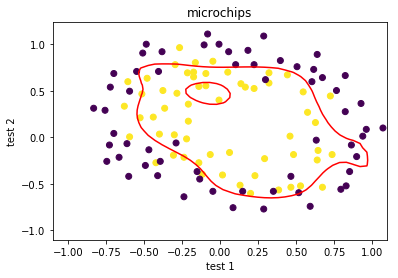

In [130]:
def get_boundary(u, v, theta, order):
    boundary = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            
            poly = PolynomialFeatures(order)
            uv = [np.array([u[i],v[j]])]
            poly_map = poly.fit_transform([np.array([u[i],v[j]])])
            boundary[i, j] = (poly_map[0].dot(np.array(theta)))

    return boundary

#plot data and boundary
fig = plt.figure()

u = np.linspace(-1.1, 1.1, 50)
v = np.linspace(-1.1, 1.1, 50)

boundary = get_boundary(u, v, theta_star, order)

plt.title('microchips')
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.scatter(X1,X2, c=y)
plt.contour(u, v, boundary, 0, colors='red')
plt.legend()
plt.show()

### Evaluating the regularized logistic regression

In [131]:
clf.score(Xmap, y)

0.8813559322033898

## Tuning the hyper-parameters
Try tuning the two hyper-parameters ($C$ and the polynome order) and see how the decision boundary and the model's accuracy evolve.

### Use a grid search

In [135]:
acc = np.zeros((10, 20))

C_range = list(10**x for x in range (0, 10))

for idx, c in enumerate(C_range):
    print(idx, sep='.', end='', flush=True) 
    for order in range(0,20):
        poly = PolynomialFeatures(order)
        Xmap = poly.fit_transform(X)
        
        clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=c).fit(Xmap, y)
        
        acc[idx,order] = clf.score(Xmap, y)

0

/Applications/MiniConda3/envs/mlpylab/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


123456789

### get  $\lambda^*$ and $order^*$ (those maximizing the accuracy)

(4, 11)
0.9067796610169492
c_star =  10000 , order_star =  11


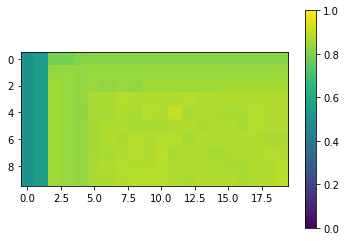

In [141]:
from numpy import unravel_index
acc_max_idx = unravel_index(acc.argmax(), acc.shape)
print(acc_max_idx)
print(acc[acc_max_idx[0], acc_max_idx[1]])


c_star = C_range[acc_max_idx[0]]
order_star = acc_max_idx[1]

print("c_star = ", c_star, ", order_star = ", order_star)


fig = plt.figure()
fig.clf()
ax = fig.add_subplot(1,1,1)
img = ax.imshow(acc, interpolation='nearest', vmin=0.0, vmax=1.0)
fig.colorbar(img)

plt.show()

### plot data and boundary

## Exercise

In [ ]:
#1) use pipelines
#1) try GridSearch and Randomised Search
#2) try SVM with different Kernels
#3) try GridSearch and Randomised Search